In [0]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import solve_triangular
import time
import pandas as pd


###6.1 Use caclulus to derive least squares estimator in the $d = 1$ (line fitting) case:

**i.)** Let $y_i = mx_i + b + \epsilon_i$. Derive explicit formulae for estimators $\hat{b}$ and $\hat{m}$ by solving for $b$ and $m$ that minimize the sum of squares $\sum_i(mx_i+b-y_i)^2$.

$\frac{\partial{f}}{\partial{m}} = 2\sum_i(mx_i + b - y_i)x_i = 2 m \sum_i x_i^2 + 2 \sum_i (b-y_i)x_i = 0$, so $\hat{m} = \frac{\sum_i(y_i-b)x_i}{\sum_i x_i^2}$

$\frac{\partial{f}}{\partial{b}} = 2\sum_i(mx_i + b - y_i) = 2b + 2\sum_i(mx_i - y_i) = 0$, so $\hat{b} = \sum_i(y_i - mx_i)$

**ii.)** Use the second-order sufficient condition to prove that this estimator is indeed a minimizer in this case.

$\Delta f = \begin{bmatrix} f_{bb} & f_{bm} \\ f_{mb} & f_{mm} \end{bmatrix} = \begin{bmatrix} 2n & 2\sum_ix_i\\ 2\sum_ix_i & 2\sum_ix_i^2 \end{bmatrix}$

We see that the diagonal elements of this Jacobian matrix are postitive, so the eigenvalues will be positive, so the matrix is positive definite, so the point is a true minimum.


###6.2 Code up a least-squares linear solver in NumPy. It should accept 2 arrays, $X$ an array of samples and $y$ an array of targets (length $n$).

It will return an array $\hat{\beta} = (X^TX)^{-1}Xy$

We use np.linalg.solve because it gets the same answer without having to worry about the nasty matrix inversion edge cases.

In [0]:
def solve_beta_weights(X,y):
  return np.linalg.solve(X.T @ X, X.T @ y)

i.) Let n = 100. Generate artificial data with one independent variable and one constant term by setting X, beta, and e as defined below, y = np.dot(X,beta) + e

In [5]:
n = 100
X = np.hstack([np.ones((n,1)),np.random.random((n,1))])
beta = [2,0.5]
e = .1 * np.random.randn(n)
y = np.dot(X,beta) + e

beta_hat = solve_beta_weights(X,y)
print("beta",beta)
print("beta_hat",beta_hat)

beta [2, 0.5]
beta_hat [1.98893655 0.5052366 ]


ii.) Plot the data from the previous step and the two lines given by $\beta$ and $\hat{\beta}$

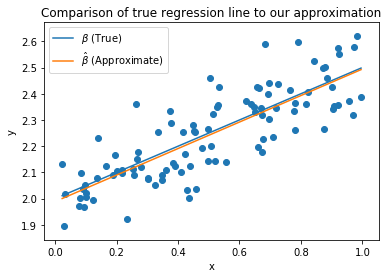

In [6]:
# Find the min and max of x to get x_domain
x_min = X[:,1].min()
x_max = X[:,1].max()

plt.scatter(X[:,1],y)
plt.plot([x_min, x_max], [beta[0] + beta[1] * x_min, beta[0] + beta[1] * x_max], label=r"$\beta$ (True)" )
plt.plot([x_min, x_max], [beta_hat[0] + beta_hat[1] * x_min, beta_hat[0] + beta_hat[1] * x_max], label=r"$\hat{\beta}$ (Approximate)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison of true regression line to our approximation")
plt.show()

iii.) Using the data below, use your solver to fit a line to the data and then again to fit a quadatic curve. Plot data, line, and curve.

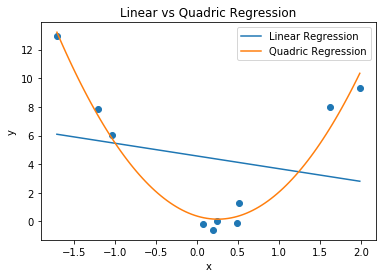

In [7]:
x = np.array([[-1.7070417, .48566752, 1.62940736, -1.03619688, .5160501, .07292432, .19432016, 1.98853255, -1.20937744, .24718355], [12.97711586, -.07882501, 8.01895309, 6.0190389, 1.28260097, -.15612727, -.5740016, 9.29385226, 7.86261889, .05378747]]).T

# Reformat nicely
y = x[:,1]
X1 = np.hstack((np.ones((10,1)),x[:,0].reshape(-1,1)))
X2 = np.hstack((np.ones((10,1)),x[:,0].reshape(-1,1), x[:,0].reshape(-1,1)**2))

# Solve for betas
beta1 = solve_beta_weights(X1,y)
beta2 = solve_beta_weights(X2,y)

# Plot points
plt.scatter(x[:,0],x[:,1])

# Plot line
x_min, x_max = x[:,0].min(), x[:,0].max()
plt.plot([x_min, x_max], [beta1[0] + beta1[1] * x_min, beta1[0] + beta1[1] * x_max], label="Linear Regression" )

# Plot curve
x_domain = np.linspace(x_min, x_max, 100)
plt.plot(x_domain, beta2[0] + beta2[1] * x_domain + beta2[2] * x_domain**2, label="Quadric Regression")
plt.legend()
plt.title("Linear vs Quadric Regression")
plt.xlabel("x")
plt.ylabel('y')
plt.show()

iv.) Let $ n = 10^4$. Generate artificial data with 3 independent variables, $\beta$ as defined below. Let $e$ and $y$ be defined as below. Run your solver and compare $\hat{\beta}$ to $\beta$

In [8]:
n = 10**4
X = np.hstack((np.ones((n,1)), np.random.randn(n,1), np.random.randn(n,1), np.random.randn(n,1)))
beta = [1,-2,3,-4]
e = .5 * np.random.randn(n)
y = np.dot(X,beta) + e

beta_hat = solve_beta_weights(X,y)

print("beta",beta)
print("beta_hat", beta_hat)


beta [1, -2, 3, -4]
beta_hat [ 0.99420564 -2.00343377  2.9987472  -4.00636073]


##6.3 
Let $X = QR$ be a QR decompostion, with $Q$ orthonormal and $R = \begin{bmatrix} R_1 \\ 0 \end{bmatrix}$ upper triangular, with $R_1$ invertible.

Let $Q^Ty = \begin{bmatrix} C \\ D \end{bmatrix}$. Prove that the least squares estimator $\hat{\beta} = argmin_\beta||X\beta-y||^2_2$ can be computed by solving for $\hat{\beta}$ in the system $R_1\hat{\beta} = C$. Hint: Prove that $||Q^T(X\beta-y)||^2_2 = ||X\beta-y||^2_2$



Since $Q$ is orthogonal, multiplying $Q^TX$ is simply a change of basis for $X$, which will not affect the norm of $X$ in any way since the 2-norm is independent of basis. Thus we see that $||Q^T(X\beta-y)||^2_2 = ||X\beta-y||^2_2$ because $Q^T$ is still just a change of basis.

Then, since $X = QR$, $||Q^T(X\beta-y)||^2_2 = ||Q^T(QR\beta-y)||^2_2 = ||(Q^TQ)R\beta-Q^Ty)||^2_2 = ||R\beta-Q^Ty)||^2_2$. Then we can see that the bottom half of $R\beta$ will be identically zero, we only care about how our choice of $\hat{\beta}$ affects the top halves of either side, meaning minimizing $||R\beta-Q^Ty)||^2_2$ really means solving for $R_1\hat{\beta} = C$, which means the top halves are identically zero, minimizing the metric since the remaining terms do not depend on $\beta$

##6.4
Code up a QR solver. Run all the experiments yet again.

In [0]:
def better_beta_solver(X,y):
  d = X.shape[1]
  Q,R = np.linalg.qr(X)
  R1 = R[:d,:d]
  C = (Q.T @ y)[:d]

  return solve_triangular(R1,C) 

i.) Let n = 100. Generate artificial data with one independent variable and one constant term by setting X, beta, and e as defined below, y = np.dot(X,beta) + e

In [10]:
n = 100
X = np.hstack([np.ones((n,1)),np.random.random((n,1))])
beta = [2,0.5]
e = .1 * np.random.randn(n)
y = np.dot(X,beta) + e

start = time.time()
beta_hat = solve_beta_weights(X,y)
o_time = time.time() - start

start = time.time()
beta_hat_2 = better_beta_solver(X,y)
n_time = time.time() - start

print("original beta:",beta)
print("old beta_hat",beta_hat, "time:", o_time)
print("new beta_hat",beta_hat_2, "time:", n_time)

original beta: [2, 0.5]
old beta_hat [1.99875534 0.52582709] time: 0.0001735687255859375
new beta_hat [1.99875534 0.52582709] time: 0.02690267562866211


ii.) Plot the data from the previous step and the two lines given by $\beta$ and $\hat{\beta}$

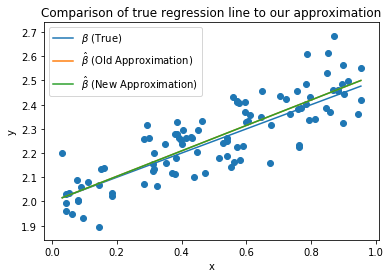

In [11]:
# Find the min and max of x to get x_domain
x_min = X[:,1].min()
x_max = X[:,1].max()

plt.scatter(X[:,1],y)
plt.plot([x_min, x_max], [beta[0] + beta[1] * x_min, beta[0] + beta[1] * x_max], label=r"$\beta$ (True)" )
plt.plot([x_min, x_max], [beta_hat[0] + beta_hat[1] * x_min, beta_hat[0] + beta_hat[1] * x_max], label=r"$\hat{\beta}$ (Old Approximation)")
plt.plot([x_min, x_max], [beta_hat_2[0] + beta_hat_2[1] * x_min, beta_hat_2[0] + beta_hat_2[1] * x_max], label=r"$\hat{\beta}$ (New Approximation)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison of true regression line to our approximation")
plt.show()

iii.) Using the data below, use your solver to fit a line to the data and then again to fit a quadatic curve. Plot data, line, and curve.

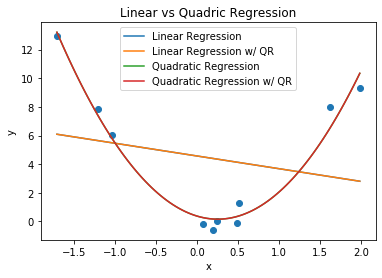

Linear Solutions
	 Old: 0.0001690387725830078
	 New: 0.0004684925079345703

Quadratic Solutions
	 Old: 9.083747863769531e-05
	 New: 0.0009465217590332031


In [12]:
x = np.array([[-1.7070417, .48566752, 1.62940736, -1.03619688, .5160501, .07292432, .19432016, 1.98853255, -1.20937744, .24718355], [12.97711586, -.07882501, 8.01895309, 6.0190389, 1.28260097, -.15612727, -.5740016, 9.29385226, 7.86261889, .05378747]]).T

# Reformat nicely
y = x[:,1]
X1 = np.hstack((np.ones((10,1)),x[:,0].reshape(-1,1)))
X2 = np.hstack((np.ones((10,1)),x[:,0].reshape(-1,1), x[:,0].reshape(-1,1)**2))

# Solve for betas
start = time.time()
beta1 = solve_beta_weights(X1,y)
t1 = time.time() - start

start = time.time()
beta2 = solve_beta_weights(X2,y)
t2 = time.time() - start

start = time.time()
qrbeta1 = better_beta_solver(X1,y)
qrt1 = time.time() - start

start = time.time()
qrbeta2 = better_beta_solver(X2,y)
qrt2 = time.time() - start

# Plot points
plt.scatter(x[:,0],x[:,1])

# Plot line
x_min, x_max = x[:,0].min(), x[:,0].max()
plt.plot([x_min, x_max], [beta1[0] + beta1[1] * x_min, beta1[0] + beta1[1] * x_max], label="Linear Regression" )
plt.plot([x_min, x_max], [qrbeta1[0] + qrbeta1[1] * x_min, qrbeta1[0] + qrbeta1[1] * x_max], label="Linear Regression w/ QR" )

# Plot curve
x_domain = np.linspace(x_min, x_max, 100)
plt.plot(x_domain, beta2[0] + beta2[1] * x_domain + beta2[2] * x_domain**2, label="Quadratic Regression")
plt.plot(x_domain, qrbeta2[0] + qrbeta2[1] * x_domain + qrbeta2[2] * x_domain**2, label="Quadratic Regression w/ QR")
plt.legend()
plt.title("Linear vs Quadric Regression")
plt.xlabel("x")
plt.ylabel('y')
plt.show()

print("Linear Solutions")
print("\t Old:",t1)
print("\t New:",qrt1)

print()
print("Quadratic Solutions")
print("\t Old:",t2)
print("\t New:",qrt2)



iv.) Let $ n = 10^4$. Generate artificial data with 3 independent variables, $\beta$ as defined below. Let $e$ and $y$ be defined as below. Run your solver and compare $\hat{\beta}$ to $\beta$

In [13]:
n = 10**4
X = np.hstack((np.ones((n,1)), np.random.randn(n,1), np.random.randn(n,1), np.random.randn(n,1)))
beta = [1,-2,3,-4]
e = .5 * np.random.randn(n)
y = np.dot(X,beta) + e

start = time.time()
beta_hat = solve_beta_weights(X,y)
t1 = time.time() - start

start = time.time()
beta_hat_2 = better_beta_solver(X,y)
t2 = time.time() - start


print("True beta: ",beta)
print("Old estimate:", beta_hat, "time:",t1)
print("New estimate:", beta_hat_2, "time:",t2)


True beta:  [1, -2, 3, -4]
Old estimate: [ 1.00946345 -1.99786847  3.01404846 -3.99869144] time: 0.0005431175231933594
New estimate: [ 1.00946345 -1.99786847  3.01404846 -3.99869144] time: 0.004305124282836914


##6.5

Read in Datasaurus Dozen from pandas. Compute mean, sample variance for $x,y$. Compute OLS weights and plot the lines. Interpret the results.

In [0]:
# from google.colab import files
# uploaded = files.upload()

         dataset          x          y
0           dino  55.384600  97.179500
1           dino  51.538500  96.025600
2           dino  46.153800  94.487200
3           dino  42.820500  91.410300
4           dino  40.769200  88.333300
...          ...        ...        ...
1841  wide_lines  33.674442  26.090490
1842  wide_lines  75.627255  37.128752
1843  wide_lines  40.610125  89.136240
1844  wide_lines  39.114366  96.481751
1845  wide_lines  34.583829  89.588902

[1846 rows x 3 columns]
[    dataset        x        y
0      dino  55.3846  97.1795
1      dino  51.5385  96.0256
2      dino  46.1538  94.4872
3      dino  42.8205  91.4103
4      dino  40.7692  88.3333
..      ...      ...      ...
137    dino  39.4872  25.3846
138    dino  91.2821  41.5385
139    dino  50.0000  95.7692
140    dino  47.9487  95.0000
141    dino  44.1026  92.6923

[142 rows x 3 columns],     dataset          x          y
142    away  32.331110  61.411101
143    away  53.421463  26.186880
144    away  63.920

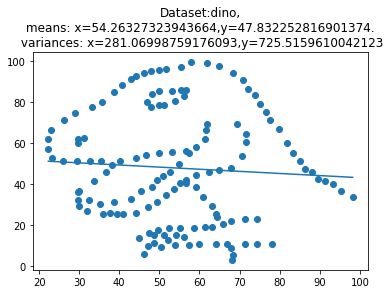

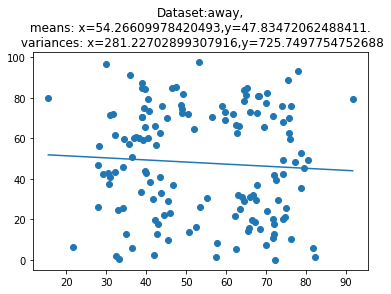

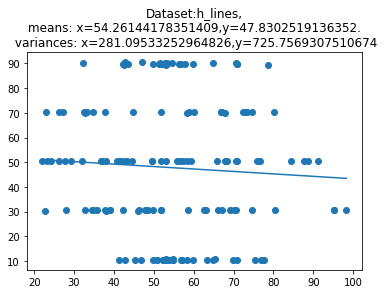

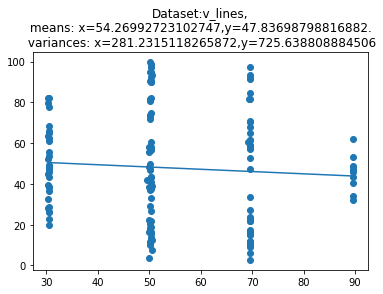

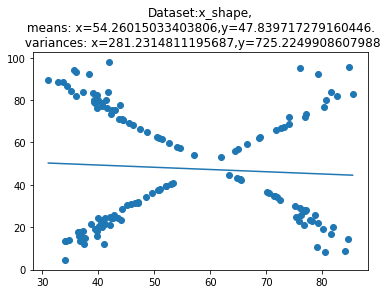

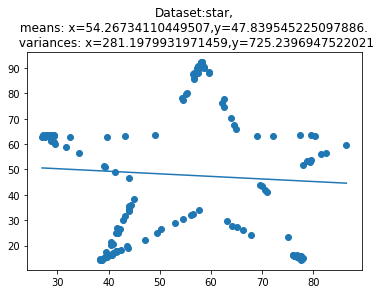

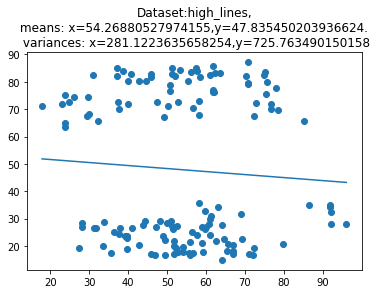

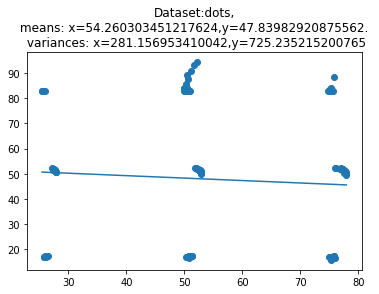

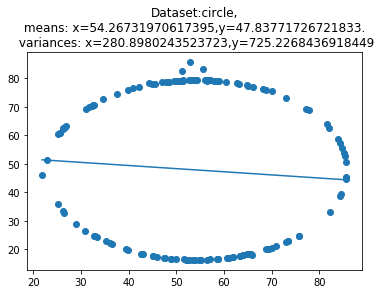

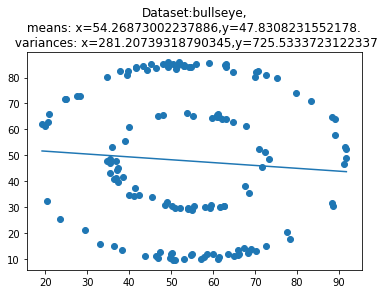

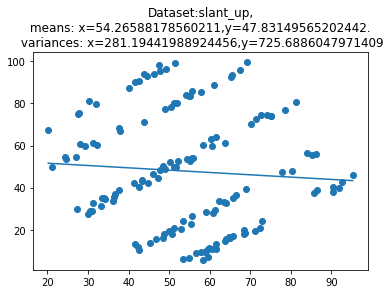

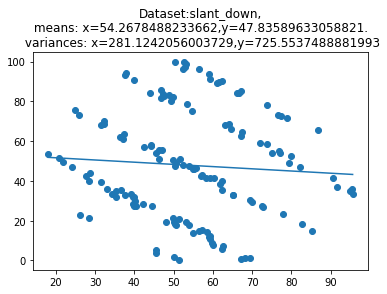

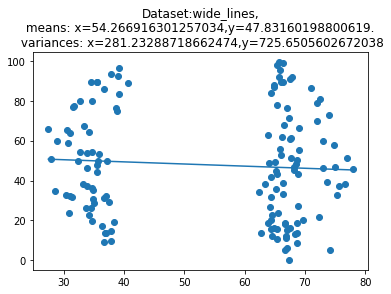

In [37]:
datasaurus = pd.read_csv("DatasaurusDozen.tsv",sep='\t',header = 0)

# Split out into series, each contianing data for a specific dataset
setNames = datasaurus.dataset.unique()
datasets = [datasaurus[datasaurus.dataset == name] for name in setNames]

# For each dataset, calculate beta and the regression line, and plot along side data
for s in datasets:
  X = np.hstack((np.ones((len(s.x),1)),s.x.to_numpy().reshape(-1,1)))
  y = s.y
  beta = better_beta_solver(X, y)
  
  # Plot data
  plt.scatter(s.x,s.y)

  # Plot regression line
  xmin = s.x.min()
  xmax = s.x.max()
  plt.plot([xmin,xmax],[beta[0] + beta[1] * xmin, beta[0]+beta[1]*xmax])

  plt.title("Dataset: {},\n means: x={}, y={}. \n variances: x={}, y={}".format(s.dataset.iloc[0], s.x.mean(), s.y.mean(), s.x.var(), s.y.var()))
  plt.show()



It is easy to see above that our OLS estimator defines the same regression line for each dataset, and that the means and variances for both x and y are the same. This is a great example of the limits of the information these metrics can tell us.

Code up an SVD solver. Run the same experiments yet again.

In [0]:
def svd_solver(X,y):
  U,S,Vh = np.linalg.svd(X,False)
  return Vh.T @ np.diag(1/S) @ U.T @ y

i.) Let n = 100. Generate artificial data with one independent variable and one constant term by setting X, beta, and e as defined below, y = np.dot(X,beta) + e

In [73]:
n = 100
X = np.hstack([np.ones((n,1)),np.random.random((n,1))])
beta = [2,0.5]
e = .1 * np.random.randn(n)
y = np.dot(X,beta) + e

start = time.time()
beta_hat = solve_beta_weights(X,y)
o_time = time.time() - start

start = time.time()
beta_hat_2 = better_beta_solver(X,y)
n_time = time.time() - start

start = time.time()
beta_hat_3 = svd_solver(X,y)
svd_time = time.time() - start



print("original beta:",beta)
print("old estimate:",beta_hat, "time:", o_time)
print("QR estimate:",beta_hat_2, "time:", n_time)
print("SVD estimate:",beta_hat_3, "time:", svd_time)

original beta: [2, 0.5]
old estimate: [1.99077074 0.51648008] time: 0.0003275871276855469
QR estimate: [1.99077074 0.51648008] time: 0.0007092952728271484
SVD estimate: [1.99077074 0.51648008] time: 0.000255584716796875


SVD is faster than QR and our old estimator!

ii.) Plot the data from the previous step and the two lines given by $\beta$ and $\hat{\beta}$

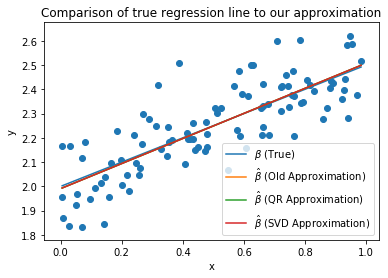

In [74]:
# Find the min and max of x to get x_domain
x_min = X[:,1].min()
x_max = X[:,1].max()

plt.scatter(X[:,1],y)
plt.plot([x_min, x_max], [beta[0] + beta[1] * x_min, beta[0] + beta[1] * x_max], label=r"$\beta$ (True)" )
plt.plot([x_min, x_max], [beta_hat[0] + beta_hat[1] * x_min, beta_hat[0] + beta_hat[1] * x_max], label=r"$\hat{\beta}$ (Old Approximation)")
plt.plot([x_min, x_max], [beta_hat_2[0] + beta_hat_2[1] * x_min, beta_hat_2[0] + beta_hat_2[1] * x_max], label=r"$\hat{\beta}$ (QR Approximation)")
plt.plot([x_min, x_max], [beta_hat_3[0] + beta_hat_3[1] * x_min, beta_hat_3[0] + beta_hat_3[1] * x_max], label=r"$\hat{\beta}$ (SVD Approximation)")

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison of true regression line to our approximation")
plt.show()

iii.) Using the data below, use your solver to fit a line to the data and then again to fit a quadatic curve. Plot data, line, and curve.

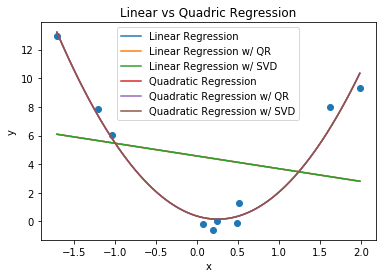

Linear Solutions
	 Old: 0.00014257431030273438
	 QR: 0.0004200935363769531
	 SVD: 0.00014829635620117188

Quadratic Solutions
	 Old: 5.841255187988281e-05
	 QR: 0.0004239082336425781
	 SVD: 0.0001690387725830078


In [75]:
x = np.array([[-1.7070417, .48566752, 1.62940736, -1.03619688, .5160501, .07292432, .19432016, 1.98853255, -1.20937744, .24718355], [12.97711586, -.07882501, 8.01895309, 6.0190389, 1.28260097, -.15612727, -.5740016, 9.29385226, 7.86261889, .05378747]]).T

# Reformat nicely
y = x[:,1]
X1 = np.hstack((np.ones((10,1)),x[:,0].reshape(-1,1)))
X2 = np.hstack((np.ones((10,1)),x[:,0].reshape(-1,1), x[:,0].reshape(-1,1)**2))

# Solve for betas
start = time.time()
beta1 = solve_beta_weights(X1,y)
t1 = time.time() - start

start = time.time()
beta2 = solve_beta_weights(X2,y)
t2 = time.time() - start

start = time.time()
qrbeta1 = better_beta_solver(X1,y)
qrt1 = time.time() - start

start = time.time()
qrbeta2 = better_beta_solver(X2,y)
qrt2 = time.time() - start

start = time.time()
svdbeta1 = svd_solver(X1,y)
svdt1 = time.time() - start

start = time.time()
svdbeta2 = svd_solver(X2,y)
svdt2 = time.time() - start


# Plot points
plt.scatter(x[:,0],x[:,1])

# Plot line
x_min, x_max = x[:,0].min(), x[:,0].max()
plt.plot([x_min, x_max], [beta1[0] + beta1[1] * x_min, beta1[0] + beta1[1] * x_max], label="Linear Regression" )
plt.plot([x_min, x_max], [qrbeta1[0] + qrbeta1[1] * x_min, qrbeta1[0] + qrbeta1[1] * x_max], label="Linear Regression w/ QR" )
plt.plot([x_min, x_max], [svdbeta1[0] + svdbeta1[1] * x_min, svdbeta1[0] + svdbeta1[1] * x_max], label="Linear Regression w/ SVD" )

# Plot curve
x_domain = np.linspace(x_min, x_max, 100)
plt.plot(x_domain, beta2[0] + beta2[1] * x_domain + beta2[2] * x_domain**2, label="Quadratic Regression")
plt.plot(x_domain, qrbeta2[0] + qrbeta2[1] * x_domain + qrbeta2[2] * x_domain**2, label="Quadratic Regression w/ QR")
plt.plot(x_domain, svdbeta2[0] + svdbeta2[1] * x_domain + svdbeta2[2] * x_domain**2, label="Quadratic Regression w/ SVD")
plt.legend()
plt.title("Linear vs Quadric Regression")
plt.xlabel("x")
plt.ylabel('y')
plt.show()

print("Linear Solutions")
print("\t Old:",t1)
print("\t QR:",qrt1)
print("\t SVD:",svdt1)

print()
print("Quadratic Solutions")
print("\t Old:",t2)
print("\t QR:",qrt2)
print("\t SVD:",svdt2)


We see in this case that the SVD performed somewhere between our original np.linalg.solve solution and the QR solution.

iv.) Let $ n = 10^4$. Generate artificial data with 3 independent variables, $\beta$ as defined below. Let $e$ and $y$ be defined as below. Run your solver and compare $\hat{\beta}$ to $\beta$

In [76]:
n = 10**4
X = np.hstack((np.ones((n,1)), np.random.randn(n,1), np.random.randn(n,1), np.random.randn(n,1)))
beta = [1,-2,3,-4]
e = .5 * np.random.randn(n)
y = np.dot(X,beta) + e

start = time.time()
beta_hat = solve_beta_weights(X,y)
t1 = time.time() - start

start = time.time()
beta_hat_2 = better_beta_solver(X,y)
t2 = time.time() - start

start = time.time()
beta_hat_3 = svd_solver(X,y)
t3 = time.time() - start

print("True beta: ",beta)
print("Old estimate:", beta_hat, "time:",t1)
print("QR estimate:", beta_hat_2, "time:",t2)
print("SVD estimate:", beta_hat_3, "time:",t3)

True beta:  [1, -2, 3, -4]
Old estimate: [ 0.99534381 -2.00853698  3.00445295 -4.00098441] time: 0.00041294097900390625
QR estimate: [ 0.99534381 -2.00853698  3.00445295 -4.00098441] time: 0.0012750625610351562
SVD estimate: [ 0.99534381 -2.00853698  3.00445295 -4.00098441] time: 0.0013587474822998047


SVD in this case actually took a little longer to solve than even QR, which was already slower than our old np.linalg.solve version.

ii.) Let $n=10^3$. Generate data with $d=6$ and $r=3$. Let $\beta, e, y$ be defined as below. Run SVD solver and compare to $\beta$. How big are the residuals $y - \hat{y}$?

In [92]:
n = 10**3

Z = np.random.random((n,3))
X = np.hstack((Z,Z))

beta = [1,-2,3,-4,5,-6]
e = .5 * np.random.randn(n)
y = np.dot(X,beta) + e

beta_hat = svd_solver(X,y)

print("beta:",beta)
print("beta_hat:", beta_hat)

y_hat = np.dot(X,beta_hat)
residuals = y - y_hat

print()
print("Residuals (y - y_hat):")
print("\t MSE: {}".format(sum(residuals**2)/n))

beta: [1, -2, 3, -4, 5, -6]
beta_hat: [ 9.93079463e+13  2.94296527e+14  3.67111363e+13 -9.93079463e+13
 -2.94296527e+14 -3.67111363e+13]

Residuals (y - y_hat):
	 MSE: 0.2601465912899332


Even though the $\hat{\beta}$ estimation was WAY off numerically, the actual residuals show that $\hat{\beta}$ actually provides an excellent estimator. This is due to the fact that when the data is not full rank, $\beta$ is not unique. The low MSE value of the residuals means that the line given by $\hat{\beta}$ is an excellent regression line.